<a href="https://colab.research.google.com/github/PennyWieser/EPS-214-Spring-2024/blob/main/MELTS_Crystallization_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This cell sets up collab

# Install GSL
!apt-get install gsl-bin

import os
data_directory = "/content/YOUR_DATA/"

# Create the directory if it doesn't exist
if not os.path.exists(data_directory):
    os.makedirs(data_directory)

# Change the current working directory
os.chdir(data_directory)

from google.colab import files
# Upload the files
uploaded_files = files.upload()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgsl27 libgslcblas0
Suggested packages:
  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html
The following NEW packages will be installed:
  gsl-bin libgsl27 libgslcblas0
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 1,106 kB of archives.
After this operation, 3,332 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libgslcblas0 amd64 2.7.1+dfsg-3 [94.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libgsl27 amd64 2.7.1+dfsg-3 [1,000 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 gsl-bin amd64 2.7.1+dfsg-3 [11.6 kB]
Fetched 1,106 kB in 0s (2,434 kB/s)
Selecting previously unselected package libgslcblas0:amd64.
(Reading database ... 121654 files and directories currently installed.)
Preparing to unpack .../libgslcbl

Saving libalphamelts.so to libalphamelts.so
Saving meltsdynamic.py to meltsdynamic.py
Saving meltsengine.py to meltsengine.py
Saving meltsstatus.py to meltsstatus.py


## Investigating magma properties and changes during fractional crystallization
- This is an example for EPS 214  - Advanced Volcanology at Berkeley

In [ ]:
# Install the packages we will need
!pip install PetThermoTools
!pip install Thermobar

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 7.0 MB/s eta 0:00:00
  Created wheel for tinynumpy: filename=tinynumpy-1.2.1-py3-none-any.whl size=18464 sha256=8ae4116464b996dda527e409faa782961080debabab919091d03f834a7d38405
  Stored in directory: /root/.cache/pip/wheels/d2/3f/7f/041dc24cd71890caaf36ad2b6ba19bd1f351f335698be12b87
Successfully built tinynumpy


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
import PetThermoTools as M

In [ ]:
M.__version__

'0.2.6'

In [ ]:
basalt = {'SiO2_Liq': 48.82,
       'TiO2_Liq': 1.45,
       'Al2O3_Liq': 13.46,
       'FeOt_Liq': 12.79,
       'MgO_Liq': 7.32,
       'CaO_Liq': 11.84,
       'Na2O_Liq':1.87,
       'K2O_Liq': 0.17,
       'H2O_Liq': 0,
       'MnO_Liq': 0,
       'P2O5_Liq': 0,
       'Fe3Fet_Liq': 0.1}

rhy = {'SiO2_Liq': 77.6,
       'TiO2_Liq': 0.09,
       'Al2O3_Liq': 12.3,
       'FeOt_Liq': 0.65,
       'MgO_Liq': 0.02,
       'CaO_Liq': 0.41,
       'Na2O_Liq': 4.49,
       'K2O_Liq': 4.69,
       'H2O_Liq': 0,
        'MnO_Liq': 0,
       'P2O5_Liq': 0,
       'Fe3Fet_Liq': 0.1}


## Part 1 - Lets investigate things that change viscosity

In [ ]:
basalt_df = pd.DataFrame([basalt])
Viscosity_basalt=pt.calculate_viscosity_giordano_2008(liq_comps=basalt_df,  T_K=1150+273.15-10*3, H2O_Liq=3, F2O_content=0)
Viscosity_basalt


Water content from input overridden


,n_melt,logn_melt,T_K,A,B,C,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,...,b13,c1,c2,c3,c4,c5,c6,c11,T_K,logn_melt
0,13.079537,1.116592,1393.15,-4.55,5379.66682,443.784585,48.82,1.45,13.46,12.79,...,247.596742,128.919716,136.197004,172.641106,124.255003,-22.6741,-235.740869,140.186725,1393.15,1.116592


In [ ]:
rhy_df = pd.DataFrame([rhy])
Viscosity_rhy=pt.calculate_viscosity_giordano_2008(liq_comps=rhy_df,  T_K=1200+273.15, H2O_Liq=6, F2O_content=0)
Viscosity_rhy


Water content from input overridden


,n_melt,logn_melt,T_K,A,B,C,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,...,b13,c1,c2,c3,c4,c5,c6,c11,T_K,logn_melt
0,105.055428,2.021418,1473.15,-4.55,9853.63914,-26.319124,77.6,0.09,12.3,0.65,...,714.019831,186.189167,100.341823,4.162524,3.909463,-78.752478,-296.287491,54.117868,1473.15,2.021418


## Part 2 - Lets look at what phases stabilize in different magmas as a function of composition, and with fractional crystallization

### 2a - lets find the liquidus for a given compositions

In [ ]:
Liq=M.findLiq_multi(Model='MELTSv1.0.2', bulk=basalt, T_initial_C=np.array([1200]), P_bar=np.array([5000]),
                     H2O_Liq=0, fO2_buffer=None)
Liq

  0%|          | 0/1 [00:00<?, ?it/s]


alphaMELTS for Python version 1.2.1 (Jan 12 2024 12:08:46)
Setting calculation mode to rhyolite-MELTS 1.0.2



,T_Liq,liquidus_phase,fluid_saturated,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,CO2_Liq,Fe3Fet_Liq
0,1269.0,clinopyroxene1,No,49.886806,1.481685,13.754125,13.068666,0.0,7.479955,12.098726,1.910863,0.173715,0.0,0.0,0.0,0.099944


### 2d- lets calculate the phases 60-80C below the liquidus

In [ ]:
dict=M.equilibrate_multi(Model='MELTSv1.0.2', bulk=basalt, T_C=1199-60,
                         P_bar=1000, H2O_Liq=1, fO2_buffer=None)

dict['Mass'] # this tells you the phases that exist.

  0%|          | 0/1 [00:00<?, ?it/s]


alphaMELTS for Python version 1.2.1 (Jan 12 2024 12:08:46)
Setting calculation mode to rhyolite-MELTS 1.0.2

['liquid1', 'clinopyroxene1']


,liquid1,clinopyroxene1
0,87.079129,11.782418


### 2e - Lets calculate the viscosity for this new system

In [ ]:
Viscosity=pt.calculate_viscosity_giordano_2008(liq_comps=dict['All'],  T_K=dict['All']['T_C']+273.15,
                                               H2O_Liq=0, F2O_content=0)
Viscosity

Water content from input overridden


,n_melt,logn_melt,T_K,A,B,C,T_C,P_bar,g,h,...,b13,c1,c2,c3,c4,c5,c6,c11,T_K,logn_melt
0,142.458308,2.153688,1412.15,-4.55,5282.412627,624.163925,1139.0,1000.0,-1.554023e+06,-1.184928e+06,...,383.653138,144.355091,166.715573,183.911242,127.129156,-28.679499,-0.0,30.732361,1412.15,2.153688


## Part 3 - Lets investigate phase stability as a function of water content

In [ ]:
Aleutian = {'SiO2_Liq': 50.04,
       'TiO2_Liq': 0.81,
       'Al2O3_Liq': 15.01,
       'FeOt_Liq': 9.62,
       'MnO_Liq': 0.16,
       'MgO_Liq': 7.28,
       'CaO_Liq': 11.52,
       'Na2O_Liq': 2.54,
       'K2O_Liq': 0.30,
       'P2O5_Liq': 0.06}

Isobaric_Xtal = M.isobaric_crystallisation(Model = "MELTSv1.2.0",
                                           bulk = Aleutian,
                                           find_liquidus = True,
                                           P_bar = 2000,
                                           H2O_Liq=np.array([0.5, 2,  4]),
                                           T_end_C = 900,
                                           dt_C = 2,
                                           fO2_buffer = "FMQ",
                                           fO2_offset = 0,
                                           Frac_solid = True,
                                           Frac_fluid = True,
                                           label = "water",
                                           timeout=90)

  0%|          | 0/2 [00:00<?, ?it/s]

Running MELTSv1.2.0 calculations 0 to 1.0 ...
alphaMELTS for Python version 1.2.1 (Jan 12 2024 12:08:46)

alphaMELTS for Python version 1.2.1 (Jan 12 2024 12:08:46)Setting calculation mode to rhyolite-MELTS 1.2.0


Setting calculation mode to rhyolite-MELTS 1.2.0

 Complete (time taken = 22.73 seconds)
Running MELTSv1.2.0 calculations 2 to 2.0 ...
alphaMELTS for Python version 1.2.1 (Jan 12 2024 12:08:46)
Setting calculation mode to rhyolite-MELTS 1.2.0

 Complete (time taken = 12.78 seconds)
dict_keys(['H2O = 0.52 wt%', 'H2O = 2.03 wt%', 'H2O = 3.95 wt%'])


In [ ]:
# How do we access the outputs? They are a dictionary, with labels based on renormalized water.
Isobaric_Xtal['H2O = 3.95 wt%']['All'].head()

,T_C,P_bar,h,s,v,dvdp,logfO2,SiO2_Liq,TiO2_Liq,Al2O3_Liq,...,Na2O_Opx,K2O_Opx,P2O5_Opx,H2O_Opx,CO2_Opx,Fe3Fet_Opx,h_Opx,mass_Opx,v_Opx,rho_Opx
0,1097.200000,2000.0,-1.230509e+06,288.218111,40.554846,-0.000273,-9.385784,49.328704,0.800569,14.835229,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1095.208081,2000.0,-1.226938e+06,287.193004,40.444284,-0.000275,-9.411514,49.345959,0.801925,14.860356,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,1093.216162,2000.0,-1.225266e+06,286.535060,40.381096,-0.000275,-9.437320,49.363210,0.803277,14.885422,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,1091.224242,2000.0,-1.223606e+06,285.880177,40.318264,-0.000275,-9.463201,49.380459,0.804627,14.910428,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,1089.232323,2000.0,-1.221959e+06,285.228322,40.255784,-0.000275,-9.489158,49.397706,0.805973,14.935375,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


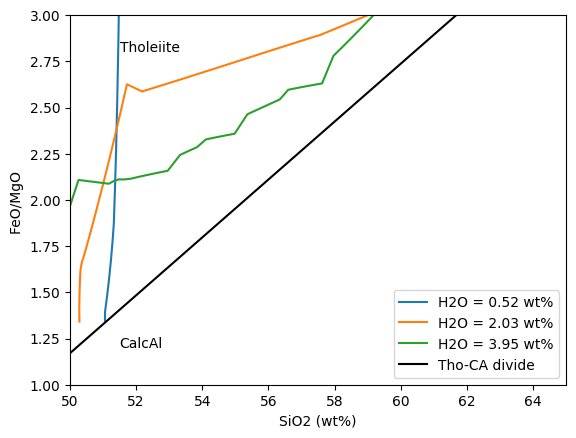

In [ ]:
# Lets loop through the different keys and plot FeO vs MgO
x='SiO2_Liq'
y='FeO/MgO'
for key in Isobaric_Xtal.keys():
    # Lets add a column for FeO/MgO
    Isobaric_Xtal[key]['All']['FeO/MgO']=Isobaric_Xtal[key]['All']['FeOt_Liq']/Isobaric_Xtal[key]['All']['MgO_Liq']
    plt.plot(Isobaric_Xtal[key]['All'][x],Isobaric_Xtal[key]['All'][y],
         '-', label=key)
# Lets add approximate boundary from web plot digitizer!
plt.plot([45, 64.95495495495496],  [0.3876918668171161, 3.5129224652087476], '-k', label='Tho-CA divide')
plt.xlim([50, 65])
plt.ylim([1, 3])
plt.annotate('CalcAl', xy=[0.1, 0.1], xycoords="axes fraction", fontsize=10)
plt.annotate('Tholeiite', xy=[0.1, 0.9], xycoords="axes fraction", fontsize=10)
plt.ylim([1, 3])
plt.ylabel('FeO/MgO ')
plt.xlabel('SiO2 (wt%)')
plt.legend()

## What is causing differences?
- This is how we look at the mass of different phases

In [ ]:
Isobaric_Xtal['H2O = 0.52 wt%']['Mass'].head()

,liquid1,clinopyroxene1,plagioclase1,clinopyroxene2,spinel1,olivine1,clinopyroxene1_cumsum,plagioclase1_cumsum,clinopyroxene2_cumsum,spinel1_cumsum,olivine1_cumsum
0,99.014158,1.154312,0.000000,0.0,0.0,0.0,1.154312,0.000000,0.0,0.0,0.0
1,97.912630,1.103827,0.000000,0.0,0.0,0.0,2.258138,0.000000,0.0,0.0,0.0
2,96.598236,1.118422,0.198255,0.0,0.0,0.0,3.376560,0.198255,0.0,0.0,0.0
3,94.487158,1.221375,0.894639,0.0,0.0,0.0,4.597936,1.092893,0.0,0.0,0.0
4,92.466120,1.167588,0.858370,0.0,0.0,0.0,5.765524,1.951263,0.0,0.0,0.0


Text(0, 0.5, 'Total mass of phase formed')

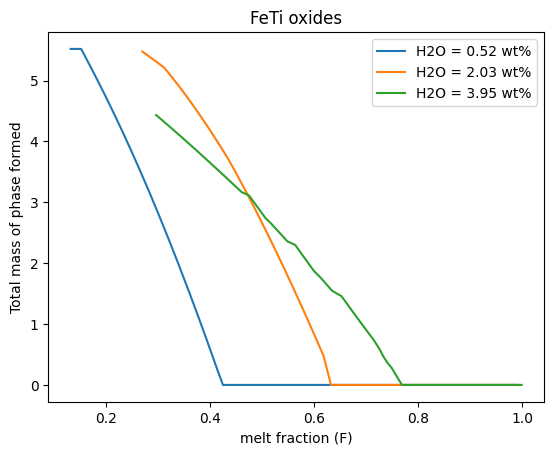

In [ ]:
x='mass_Liq'
y='spinel1_cumsum'

for key in Isobaric_Xtal.keys():
    plt.plot(Isobaric_Xtal[key]['All'][x]/100,Isobaric_Xtal[key]['Mass'][y],
         '-', label=key)
plt.legend()
plt.title('FeTi oxides')

plt.xlabel('melt fraction (F)')
plt.ylabel('Total mass of phase formed')


Text(0, 0.5, 'Total mass of phase formed')

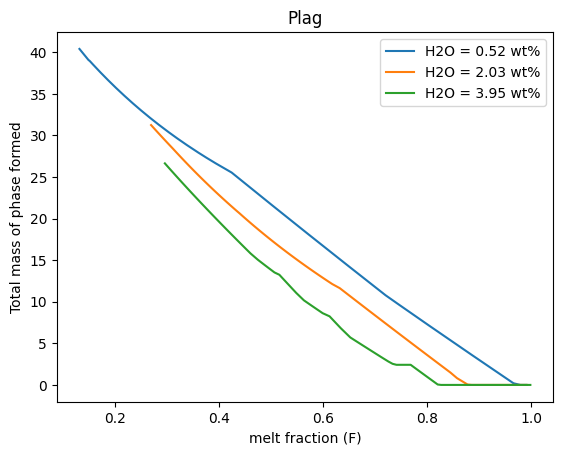

In [ ]:
x='mass_Liq'
y='plagioclase1_cumsum'

for key in Isobaric_Xtal.keys():
    plt.plot(Isobaric_Xtal[key]['All'][x]/100,Isobaric_Xtal[key]['Mass'][y],
         '-', label=key)
plt.legend()
plt.title('Plag')

plt.xlabel('melt fraction (F)')
plt.ylabel('Total mass of phase formed')


Text(0, 0.5, 'Total mass of phase formed')

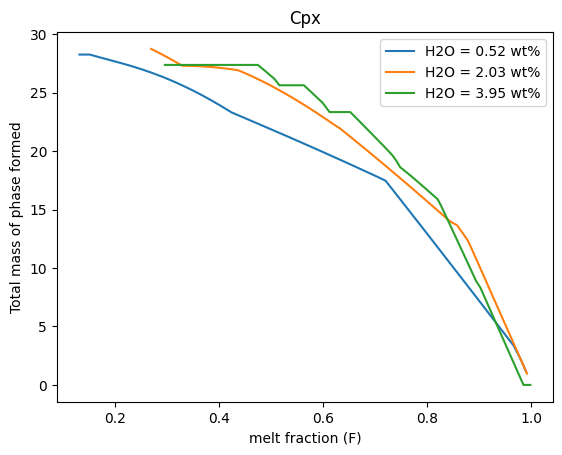

In [ ]:
x='mass_Liq'
y='clinopyroxene1_cumsum'

for key in Isobaric_Xtal.keys():
    plt.plot(Isobaric_Xtal[key]['All'][x]/100,Isobaric_Xtal[key]['Mass'][y],
         '-', label=key)
plt.legend()
plt.title('Cpx')

plt.xlabel('melt fraction (F)')
plt.ylabel('Total mass of phase formed')


Text(0, 0.5, 'Total mass of phase formed')

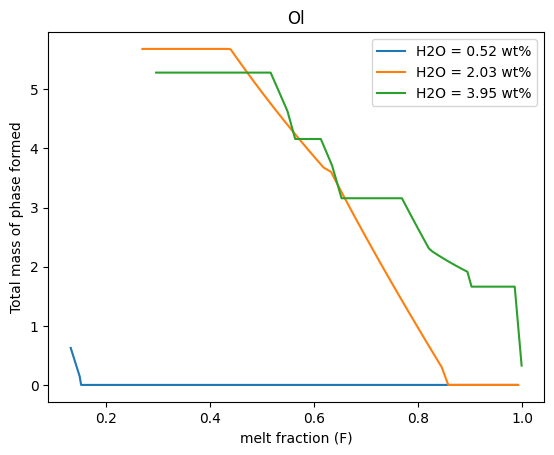

In [ ]:
x='mass_Liq'
y='olivine1_cumsum'

for key in Isobaric_Xtal.keys():
    plt.plot(Isobaric_Xtal[key]['All'][x]/100,Isobaric_Xtal[key]['Mass'][y],
         '-', label=key)
plt.legend()
plt.title('Ol')

plt.xlabel('melt fraction (F)')
plt.ylabel('Total mass of phase formed')


In [ ]:
## Now try yourself, edit the code to use a single water content, but different fo2. e.g., fO2_offset = np.array([x, y, z])